### Experiments
For our experiments, we will be experimenting with 3 different regression models:
- Lasso
- Elastic Net
- Ridge Regression
<br><br>

To measure the effectiveness of our experiments and compare them with our baseline Linear Regression model, we will be using the following metrics:
- Explained Variance (R²) = Goodness of fit of regression model. R² value ranges from 0 to 1, with a value of 1 indicating a perfect fit.
- Mean Squared Error (MSE) = Average of the squared errors (differences between actual and predicted values). The MSE value ranges from 0 to infinity, with a lower value indicating a better fit.
- Root Mean Squared Error (RMSE) = Average magnitude of the errors in a regression model (square root of MSE). Lower value of the RMSE indicates a better fit.


<br> After analysing each model's effectiveness, we will attempt to tune the hyperparameters of all our models to maximize each model's performance. Once all the models are tuned, we will then test the tuned model using our test dataset. The best model is ultimately chosen by comparing the performance of different models.

### The Lasso Model

Lasso regression is a type of linear regression model that can be used for predicting car prices based on different factors. It is a regularized regression method that can handle high-dimensional datasets by shrinking the coefficients of irrelevant or less important features to zero, while keeping the important features with non-zero coefficients.

The Lasso model is used to find a linear relationship between the independent variables (such as mileage, age, brand, horsepower, engine capacity, etc.) and the dependent variable (i.e. car price) by minimizing the sum of the squared errors between the predicted and actual values. In addition to this, it also adds a penalty term to the loss function, which is a multiple of the sum of the absolute values of the coefficients. This penalty term encourages the model to keep only the important features and reduce the effect of irrelevant features.


Lasso regression has several advantages over ordinary linear regression, such as feature selection, which helps to identify the most important features for predicting the car prices, and reducing overfitting, which can occur in high-dimensional datasets. 

However, it also has some limitations, such as the inability to handle multicollinearity and the need for careful tuning of the regularization parameter.

### Obtain HyperParameters for the Lasso Model

These are the default hyperparameters for the Lasso model.

In [52]:
lasso_model = Lasso(random_state=128)
lasso_model_params = lasso_model.get_params()
lasso_model_params

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 128,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

### Training for  Lasso Model

In [53]:
# Lasso using Train Data
lasso = Lasso()         
lasso.fit(X_train, y_train)        

Lasso()

In [54]:
y_train_pred = lasso.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)


### Lasso Training Results
The Lasso model seems to have good fit our training dataset and achieve the following the results on the training dataset:<br>
- Explained Variance (R²) 	: 0.8384426377152502
- Mean Squared Error (MSE) 	: 14366139.365396755
- Root Mean Squared Error (RMSE) 	: 3790.2690360179913

In [55]:
print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8384426377152502
Mean Squared Error (MSE) 	: 14366139.365396755
Root Mean Squared Error (RMSE) 	: 3790.2690360179913



### Testing for Lasso Model

In [56]:
y_test_pred = lasso.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)


### Lasso Testing Results
The Lasso model seems to have good fit our testing dataset and achieve the following the results on the testing dataset:<br>
- Explained Variance (R²) 	: 0.7909242879003221
- Mean Squared Error (MSE) 	: 21559213.05394048
- Root Mean Squared Error (RMSE) 	: 4643.189965308385

In [62]:
print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7909242879003221
Mean Squared Error (MSE) 	: 14366139.365396755
Root Mean Squared Error (RMSE) 	: 3790.2690360179913


### Tuning Lasso HyperParameters
We will be using GridSearchCV that runs through all the different parameters that is fed into the parameter grid and find the optimal set of hyperparameters for Lasso model, thereby improving its performance. 

In [63]:
parameters = { 'alpha' : [0.005, 0.02, 0.03, 0.05, 0.06, 0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
                'fit_intercept' : [0, 1],
                'positive': [0,1],
                'selection' : ['cyclic', 'random']
             }

In [64]:
grid_lasso = GridSearchCV(lasso,parameters)
grid_lasso = grid_lasso.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lasso.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_lasso.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=1, fit_intercept=1, positive=0)

 The best parameters across ALL searched params:
 {'alpha': 1, 'fit_intercept': 1, 'positive': 0, 'selection': 'cyclic'}


### Retrain Lasso model using Tuned HyperParameters

Analysing the hyperparameters returned by GridSearchCV, the best and relavant parameters across ALL searched params that affects estimation: Lsso(alpha=1, fit_intercept=1, positive=0)

In [65]:
lasso_tuned = Lasso(alpha = 1, fit_intercept= 1, positive = 0, selection = 'cyclic')
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=1, fit_intercept=1, positive=0)

#### Lasso  Training results using Tuning HyperParameters
Our tuned Lasso model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.8384426377152502
- Mean Squared Error (MSE) 	: 14366139.365396755
- Root Mean Squared Error (RMSE) 	: 3790.2690360179913

In [66]:
# Predict Price values corresponding to Selected Features
y_train_pred = lasso_tuned.predict(X_train)

print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso_tuned.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, y_train_pred)

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8384426377152502
Mean Squared Error (MSE) 	: 14366139.365396755
Root Mean Squared Error (RMSE) 	: 3790.2690360179913


#### Lasso Testing results using Tuning HyperParameters
Our tuned Lasso model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.7909242879003221
- Mean Squared Error (MSE) 	: 21559213.05394048
- Root Mean Squared Error (RMSE) 	: 4643.189965308385

In [67]:
y_test_pred = lasso_tuned.predict(X_test)

print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso_tuned.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_test, y_test_pred)

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7909242879003221
Mean Squared Error (MSE) 	: 21559213.05394048
Root Mean Squared Error (RMSE) 	: 4643.189965308385


#### Default parameters are already performing at their best (R² and RMSE values unchanged), so we won't alter them any further.

### The Gradient Boosting Regressor Model

Gradient Boosting Regressor is a popular machine learning algorithm that can be used to predict car prices based on different factors. It is an ensemble method that combines multiple decision trees to form a strong predictive model. The algorithm works by iteratively adding decision trees to the model, each one correcting the errors of the previous tree.

The key idea is that the algorithm starts by fitting a simple decision tree to the data and making predictions. The errors (i.e., residuals) of this initial model are then calculated, and a second decision tree is fitted to the residuals. The predictions of the second tree are added to the predictions of the first tree to create a better prediction. This process is repeated multiple times, with each new decision tree trying to improve the predictions of the previous trees by correcting their errors.

Gradient Boosting Regressor can handle both numerical and categorical variables, making it useful for predicting car prices based on a variety of factors such as brand, model, mileage and more. It uses a loss function, such as mean squared error (MSE), to measure the difference between the predicted values and the actual values. It then optimizes the loss function using a gradient descent algorithm to find the best set of parameters for the model and includes regularization techniques, such as learning rate and max_depth, to prevent overfitting and improve the generalization of the model.



### Obtain HyperParameters for the Gradient Boosting Regressor
These are the default hyperparameters for the Gradient Boosting Regressor model.

In [68]:
GBR_model = GradientBoostingRegressor()
GBR_model_params = GBR_model.get_params()
GBR_model_params

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Training for Gradient Boosting Regressor Model

In [69]:
GBR = GradientBoostingRegressor()      
GBR.fit(X_train, y_train)        

GradientBoostingRegressor()

In [70]:
y_train_pred = GBR.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

### GBR Training Results
The GBR model seems to have good fit our training dataset and achieve the following the results on the training dataset:<br>
- Explained Variance (R²) 	: 0.9085565693063211
- Mean Squared Error (MSE) 	: 8131409.493304135
- Root Mean Squared Error (RMSE) 	: 2851.562640606749

In [71]:
print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.9085565693063211
Mean Squared Error (MSE) 	: 8131409.493304137
Root Mean Squared Error (RMSE) 	: 2851.5626406067495



### Testing for GBR Model

In [72]:
y_test_pred = GBR.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)

### GBR Testing Results
The GBR model seems to have good fit our testing dataset and achieve the following the results on the testing dataset:<br>
- Explained Variance (R²) 	: 0.8756569204523628
- Mean Squared Error (MSE) 	: 12821857.291929364
- Root Mean Squared Error (RMSE) 	: 3580.762110491196

In [73]:
print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.8756569204523628
Mean Squared Error (MSE) 	: 12821857.291929364
Root Mean Squared Error (RMSE) 	: 3580.762110491196


### Tuning Gradient Boosting Regressor HyperParameters
We will be using GridSearchCV that runs through all the different parameters that is fed into the parameter grid and find the optimal set of hyperparameters for GBR model, thereby improving its performance. 


In [80]:
parameters = { 'loss' : ['huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'squared_error'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [81]:
grid_GBR = GridSearchCV(GBR,parameters)
grid_GBR = grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.5, loss='huber', max_features='auto')

 The best parameters across ALL searched params:
 {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_features': 'auto'}


### Retrain GBR model using Tuned HyperParameters

In [83]:
GBR_tuned = GradientBoostingRegressor(criterion = 'friedman_mse', learning_rate = 0.5, loss = 'huber', max_features = 'auto')
GBR_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, loss='huber', max_features='auto')

#### GBR  Training results using Tuning HyperParameters
Our tuned GBR model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.9456458479011292
- Mean Squared Error (MSE) 	: 4833325.532785449
- Root Mean Squared Error (RMSE) 	: 2198.482552304077

In [86]:
y_train_pred = GBR_tuned.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR_tuned.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.9456458479011292
Mean Squared Error (MSE) 	: 4833325.532785449
Root Mean Squared Error (RMSE) 	: 2198.482552304077


#### GBR Testing results using Tuning HyperParameters
Our tuned GBR model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.8984437479488029
- Mean Squared Error (MSE) 	: 10472153.139852019
- Root Mean Squared Error (RMSE) 	: 3236.0706327044254

In [87]:
y_test_pred = GBR_tuned.predict(X_test)

print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR_tuned.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_test, y_test_pred)

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.8984437479488029
Mean Squared Error (MSE) 	: 10472153.139852019
Root Mean Squared Error (RMSE) 	: 3236.0706327044254


#### We have found that the hyperparameters returned by GridSearchCV provides a better Goodness Fit of model and lesser MSE, hence we will adjust the hyperparemeters of GBR Model accordingly.

### The Ridge Regression Model

Ridge regression is a type of linear regression model that can be used to predict car prices based on different factors. It is a regularized regression method that can handle high-dimensional datasets by shrinking the coefficients of irrelevant or less important features towards zero, while still keeping all features in the model.

The model is used to identify the most important factors for predicting the car prices and to estimate the effect of each factor on the car prices. It is used to find a linear relationship between the independent variables (such as mileage, age, brand, horsepower, engine capacity, etc.) and the dependent variable (i.e., car price) by minimizing the sum of the squared errors between the predicted and actual values, subject to a penalty term. This penalty term is the multiple of the sum of the SQUARED values of the coefficients., which encourages the model to reduce the effect of irrelevant features and focus on the important features.

In the context of predicting car prices,  It can also be used to make predictions for new cars based on their features and to evaluate the performance of the model using metrics such as R-squared and mean squared error.

Ridge regression has several advantages over ordinary linear regression, such as reducing overfitting, which can occur in high-dimensional datasets, and improving the stability of the model by reducing the variance of the estimates.

However, it also has some limitations, such as the inability to handle multicollinearity and the need for careful tuning of the regularization parameter.


### Obtain HyperParameters for the Ridge Regression Model
These are the default hyperparameters for the Ridge Regression model.

In [88]:
ridge_model = Ridge()
ridge_model_params = ridge_model.get_params()
ridge_model_params

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

### Training for Ridge Regression Model

In [89]:
ridge = Ridge()        
ridge.fit(X_train, y_train)

Ridge()

In [90]:
y_train_pred = ridge.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

### Ridge Regression Training Results
The Ridge Regression model seems to have good fit our training dataset and achieve the following the results on the training dataset:<br>
- Explained Variance (R²) 	: 0.8336528192418362
- Mean Squared Error (MSE) 	: 14792063.623820428
- Root Mean Squared Error (RMSE) 	: 3846.0451926388523

In [91]:
print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8336528192418362
Mean Squared Error (MSE) 	: 14792063.623820428
Root Mean Squared Error (RMSE) 	: 3846.0451926388523



### Testing for Ridge Regression Model

In [92]:
y_test_pred = ridge.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)

### Ridge Regression Testing Results
The Ridge Regression model seems to have good fit our testing dataset and achieve the following the results on the testing dataset:<br>
- Explained Variance (R²) 	: 0.7912300265259387
- Mean Squared Error (MSE) 	: 21527686.27303279
- Root Mean Squared Error (RMSE) 	: 4639.79377483879

In [93]:
print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7912300265259387
Mean Squared Error (MSE) 	: 21527686.27303279
Root Mean Squared Error (RMSE) 	: 4639.79377483879


### Tuning Ridge Regression HyperParameters
We will be using GridSearchCV that runs through all the different parameters that is fed into the parameter grid and find the optimal set of hyperparameters for Ridge Regression model, thereby improving its performance. 

Analysing the hyperparameters returned by GridSearchCV, the best parameters across ALL searched params that affects estimation: Ridge(alpha = 1, solver = 'auto', positive = 0)

In [94]:
parameters = { 'alpha' : [0.005, 0.02, 0.03, 0.05, 0.06, 0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
              'positive': [0,1],
              'solver': ['auto']
             }

In [95]:
grid_ridge = GridSearchCV(ridge,parameters)
grid_ridge = grid_ridge.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_ridge.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_ridge.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Ridge(alpha=1, positive=0)

 The best parameters across ALL searched params:
 {'alpha': 1, 'positive': 0, 'solver': 'auto'}


### Retrain Ridge Regression model using Tuned HyperParameters

In [96]:
ridge_tuned = Ridge(alpha = 1, solver = 'auto', positive = 0)
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=1, positive=0)

#### Ridge Regression  Training results using Tuning HyperParameters
Our tuned Ridge Regression model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.8336528192418362
- Mean Squared Error (MSE) 	: 14792063.623820428
- Root Mean Squared Error (RMSE) 	: 3846.0451926388523

In [97]:
y_train_pred = ridge_tuned.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge_tuned.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8336528192418362
Mean Squared Error (MSE) 	: 14792063.623820428
Root Mean Squared Error (RMSE) 	: 3846.0451926388523


#### Ridge Regression Testing results using Tuning HyperParameters
Our tuned Ridge Regression model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.7914456349458856
- Mean Squared Error (MSE) 	: 21505453.42821701
- Root Mean Squared Error (RMSE) 	: 4637.39726875076

In [98]:
y_test_pred = ridge_tuned.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)


print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge_tuned.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7912300265259387
Mean Squared Error (MSE) 	: 21527686.27303279
Root Mean Squared Error (RMSE) 	: 4639.79377483879


#### The default parameters are already performing at their best (R² and RMSE values unchanged), so we won't alter them any further.

## Comparing performance of 4 models

### Comparing Train performance

Overall, all our models have managed to fit well on our train dataset.

At this stage, we would rank the models in descending R² and ascending MSE & RMSE order:
1) Gradient Regressor Booster
2) Lasso
3) Ridge Regression
4) Linear Regression


| Model | R-squared (R²) | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE)  |
| :- | :-: | :-: | :-: |
| Linear regression | 0.8328 | 14865860 | 3855 |
| Lasso | 0.8384 | 14366139 | 3790 |
| Gradient Regressor Booster | 0.9456 | 4833325 | 2198 |
| Ridge Regression | 0.8336 | 14792063 | 3846 |

### Comparing Test performance

Overall, all our models have managed to fit well on our test dataset.

At this stage, we would rank the models in descending R² and ascending MSE & RMSE order:
1) Gradient Regressor Booster
2) Ridge Regression
3) Lasso
4) Linear Regression


| Model | R-squared (R²) | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE)  |
| :- | :-: | :-: | :-: |
| Linear regression | 0.7211 | 28751536 | 5362 |
| Lasso | 0.7909 | 21559213 | 4643 |
| Gradient Regressor Booster | 0.8984 | 10472153 | 3236 |
| Ridge Regression | 0.7912 | 21527686 | 4639 |

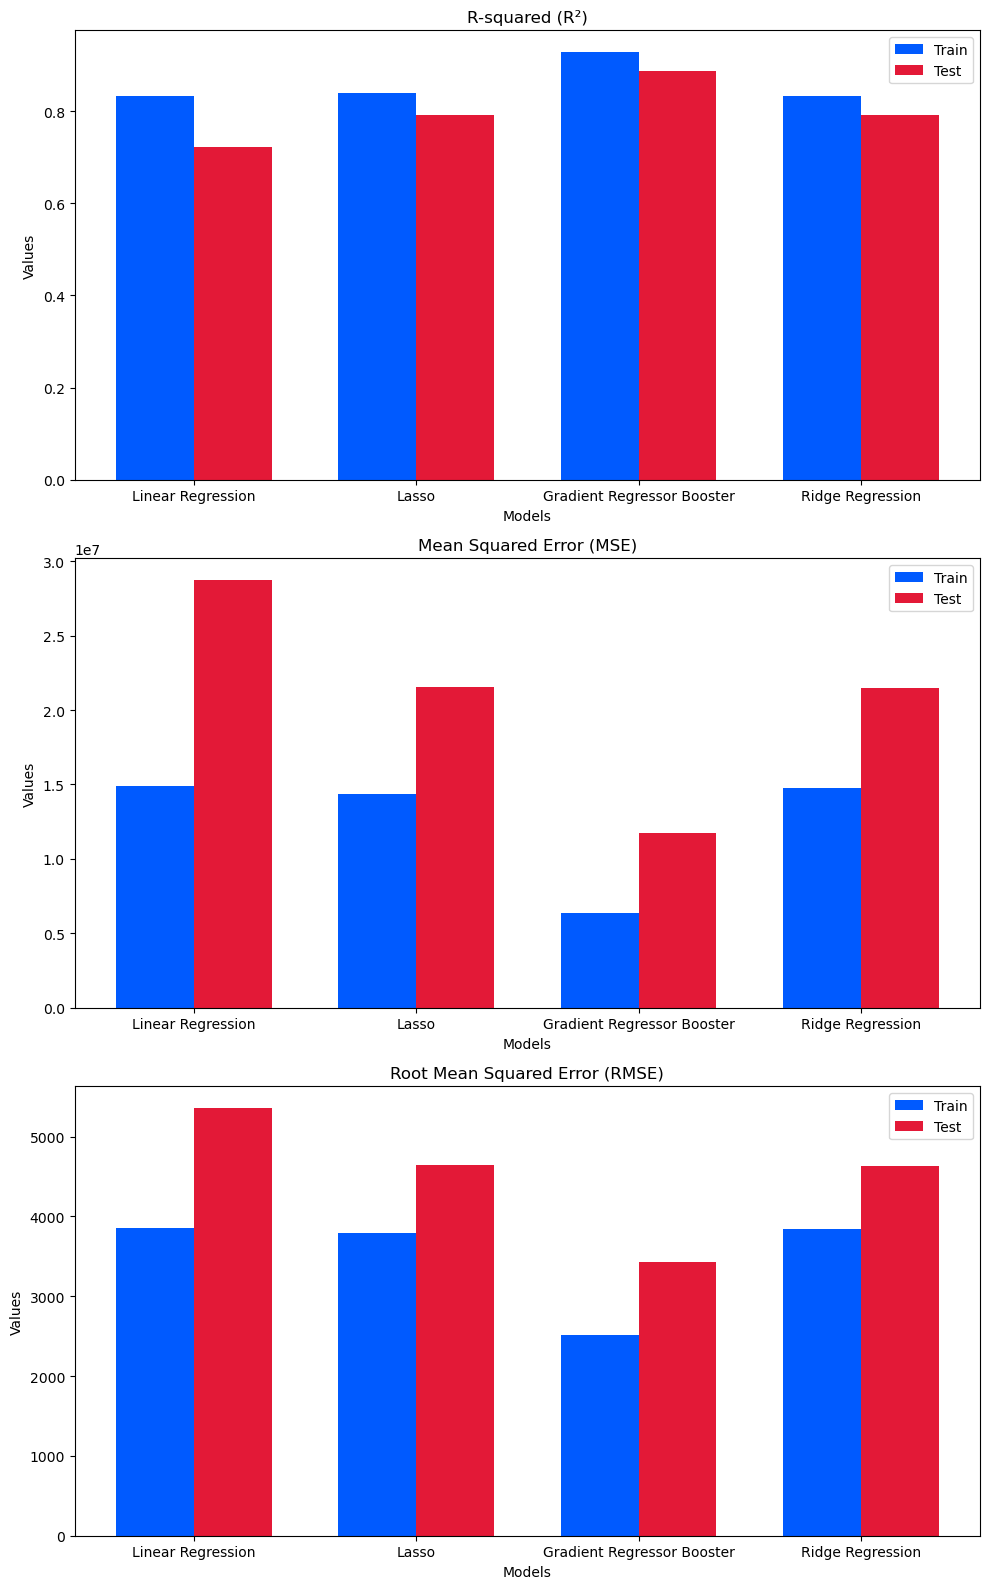

In [743]:
# Visual representation of table
models = ['Linear Regression', 'Lasso', 'Gradient Regressor Booster', 'Ridge Regression']
r_squared_train = [0.8328, 0.8384, 0.9287, 0.8337]
mse_train = [14865861, 14366139, 6337768, 14792064]
rmse_train = [3856, 3790, 2517, 3846]
r_squared_test = [0.7212, 0.7909, 0.8861, 0.7914]
mse_test = [28751536, 21559213, 11749565, 21505453]
rmse_test = [5362, 4643, 3427, 4637]

# Define colors for each model
colors1 = ['#005AFF', '#005AFF', '#005AFF', '#005AFF']
colors2 = ['#E31937', '#E31937', '#E31937', '#E31937']

# Define the bar width
bar_width = 0.35

# Create subplots with shared X-axis
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 16), sharex=True)

# R-squared plot
axs[0].bar(np.arange(len(models)), r_squared_train, width=bar_width, color=colors1, label='Train')
axs[0].bar(np.arange(len(models)) + bar_width, r_squared_test, width=bar_width, color=colors2, label='Test')
axs[0].set_title('R-squared (R²)')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Values')
axs[0].legend()
axs[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# MSE plot
axs[1].bar(np.arange(len(models)), mse_train, width=bar_width, color=colors1, label='Train')
axs[1].bar(np.arange(len(models)) + bar_width, mse_test, width=bar_width, color=colors2, label='Test')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Values')
axs[1].legend()
axs[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# RMSE plot
axs[2].bar(np.arange(len(models)), rmse_train, width=bar_width, color=colors1, label='Train')
axs[2].bar(np.arange(len(models)) + bar_width, rmse_test, width=bar_width, color=colors2, label='Test')
axs[2].set_title('Root Mean Squared Error (RMSE)')
axs[2].set_xlabel('Models')
axs[2].set_ylabel('Values')
axs[2].legend()
axs[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# Set X-axis ticks and labels for each subplot
for ax in axs:
    ax.set_xticks(np.arange(len(models)) + bar_width / 2)
    ax.set_xticklabels(models)

plt.tight_layout()
plt.show()


#### In short, the Gradient Regressor Booster Model provides the best R² as well as the lowest MSE & RMSE. The Ridge Regression and Lasso models follow. Finally, Linear Regression with the worst R² and the highest MSE & RMSE.